Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load data train

In [2]:
from google.colab import files
uploaded = files.upload()

In [3]:
df_train = pd.read_csv('train.csv')
df = pd.read_csv('data_travel_insurance.csv')
display(df.head(), df_train.head())

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57.0,0
1,EPX,Travel Agency,Online,Others,4,MALAYSIA,10.0,0.0,33.0,0
2,Others,Airlines,Online,Others,19,INDIA,22.0,7.7,26.0,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59.0,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28.0,0


In [4]:
df['Claim'] = df['Claim'].map({
    'No' : 0,
    'Yes' : 1
})

<Figure size 720x720 with 0 Axes>

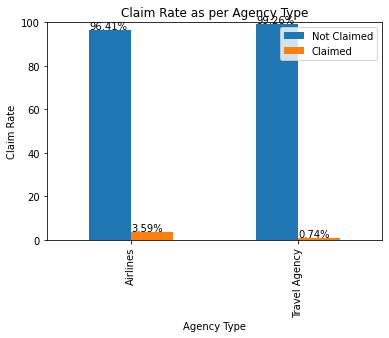

In [5]:
claim_agency_type = pd.DataFrame(df.groupby(['Agency Type'])['Claim'].value_counts(normalize = True)*100)
claim_agency_type.columns = ['Claim_Rate'] #Replacing claim column with claim rate
plt.figure(figsize=(10,10))
ax = claim_agency_type.unstack().plot(kind= 'bar')

for i in ax.patches:
    w,h = i.get_width(), i.get_height()
    x,y = i.get_xy()
    ax.annotate(str(np.round(h,2)) + '%', (x,y+h+0.5))

plt.ylabel('Claim Rate')
plt.legend(['Not Claimed', 'Claimed'])
plt.title('Claim Rate as per Agency Type')
plt.ylim(0,100)
# plt.style.use('seaborn')
plt.show()

claim rate pada agency type tidak diubah sehingga bisa gunakan df atau df_train

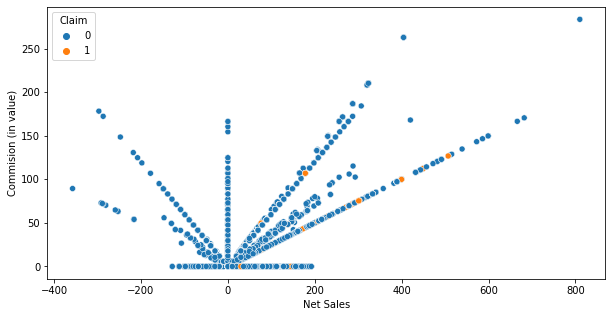

In [6]:
# cek korelasi net sales dengan commission sebelum data cleaning
plt.figure(figsize=(10,5))
sns.scatterplot('Net Sales', 'Commision (in value)', hue = 'Claim', data = df)

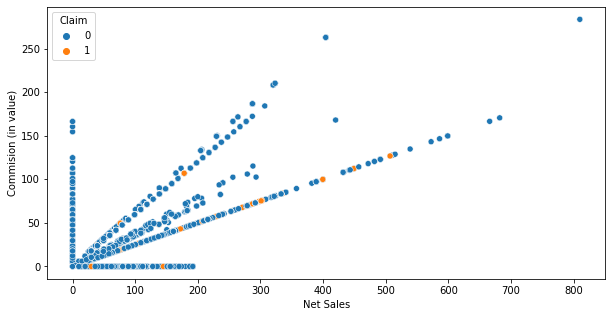

In [7]:
# cek korelasi net sales dengan commission sebelum data cleaning
plt.figure(figsize=(10,5))
sns.scatterplot('Net Sales', 'Commision (in value)', hue = 'Claim', data = df_train)

In [8]:
#Table untuk Claim dan Commission terhadap Agency
table1 = pd.crosstab(df['Agency'], df['Claim'], margins = True)

# table1.drop(index=['All'],inplace=True)
table1 = (table1.div(table1['All'],axis = 0))*100

table1['mean commision'] = df.groupby('Agency')['Commision (in value)'].mean()
table1['Count'] = df.groupby('Agency')['Claim'].count()
table1

Claim,0,1,All,mean commision,Count
Agency,,,,,
ADM,100.000000,0.000000,100.0,39.250545,55.0
ART,100.000000,0.000000,100.0,10.743057,229.0
C2B,92.925430,7.074570,100.0,20.552319,5753.0
CBH,98.550725,1.449275,100.0,10.019565,69.0
CCR,98.412698,1.587302,100.0,10.211667,126.0
CSR,98.529412,1.470588,100.0,10.453235,68.0
CWT,98.929766,1.070234,100.0,32.260756,5980.0
EPX,99.460578,0.539422,100.0,0.000000,24656.0
JWT,99.233716,0.766284,100.0,21.456705,522.0


dipilih gunakan data df karena dibutuhkan full list dari agency

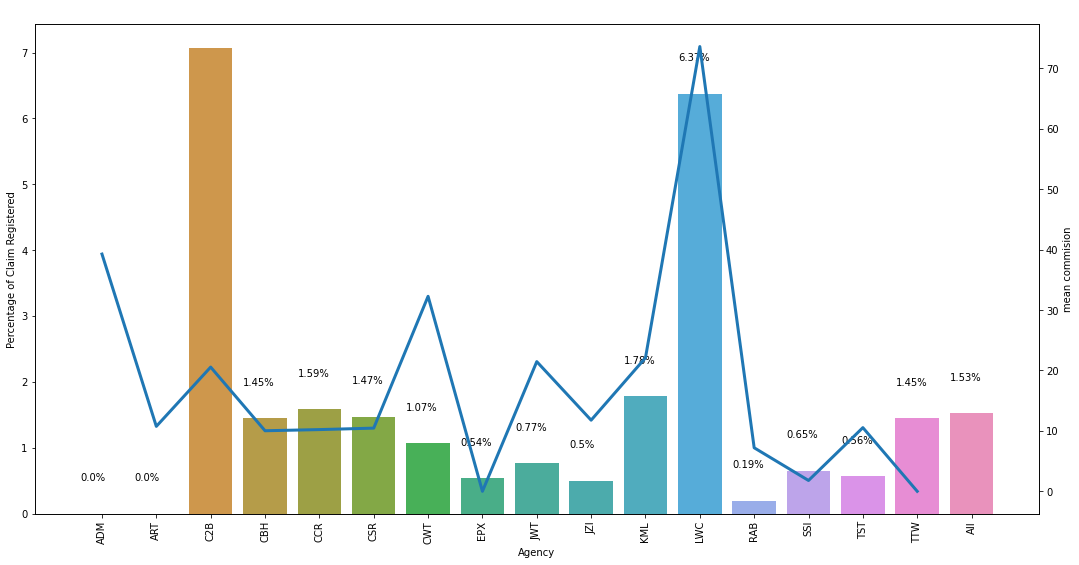

In [9]:
# Graphical representation for claimed agency 
fig,ax1=plt.subplots(figsize=(18,9))
ay = sns.barplot(table1.index,table1[1],ax=ax1)

for i in ay.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    ay.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.xticks(rotation=90)
ax1.set(ylabel='Percentage of Claim Registered')
ax2=ax1.twinx()
sns.lineplot(table1.index,table1['mean commision'],ax=ax2,linewidth=3);

**Insights :**
- Certain agencies have less registered claims but they draw high commission on the Insurance policies (CBH, CSR, CWT, JWT)
- C2B & TTW have higher percent of registered claims but the mean commission is very low
- LWC have higher claim rate & mean commission

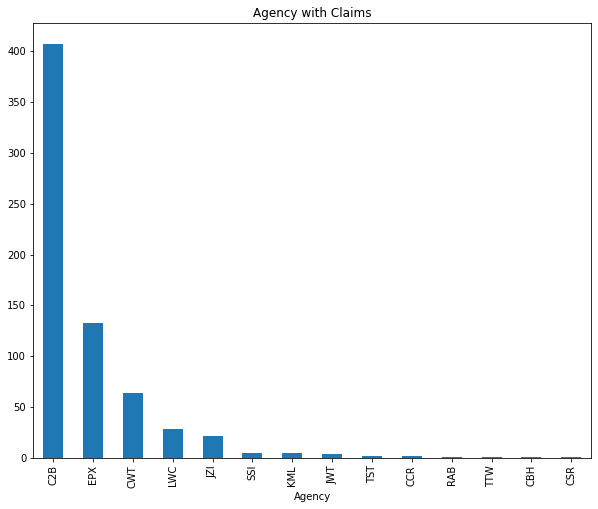

In [10]:
#Jumlah  Claim registered
plt.figure(figsize = (10,8))
claimed = df[df['Claim']==1]
claimed['Agency'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.title('Agency with Claims')
plt.xlabel('Agency')
# plt.style.use('seaborn')
plt.show()

<Figure size 720x576 with 0 Axes>

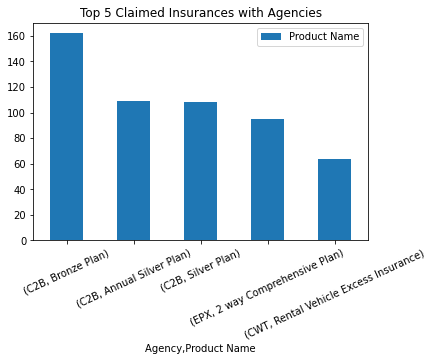

In [11]:
#plotting top 5 Claimed Insurances with Agencies
claimed = df[df['Claim']==1]
plt.figure(figsize = (10,8))
pd.DataFrame(claimed.groupby(['Agency'])['Product Name'].value_counts().sort_values(ascending=False))[:5].plot(kind='bar')
plt.xticks(rotation = 25)
plt.title('Top 5 Claimed Insurances with Agencies')
# plt.style.use('seaborn')
plt.show()

**Insights :** C2B has maximum claims registered for Bronze and Annual Silver Plan followed by EPX in 2 way Comprehensive Plan<br> 
**Recommendations :** We should increase the premium of these Plans. Automate the process with less overhead and overlay

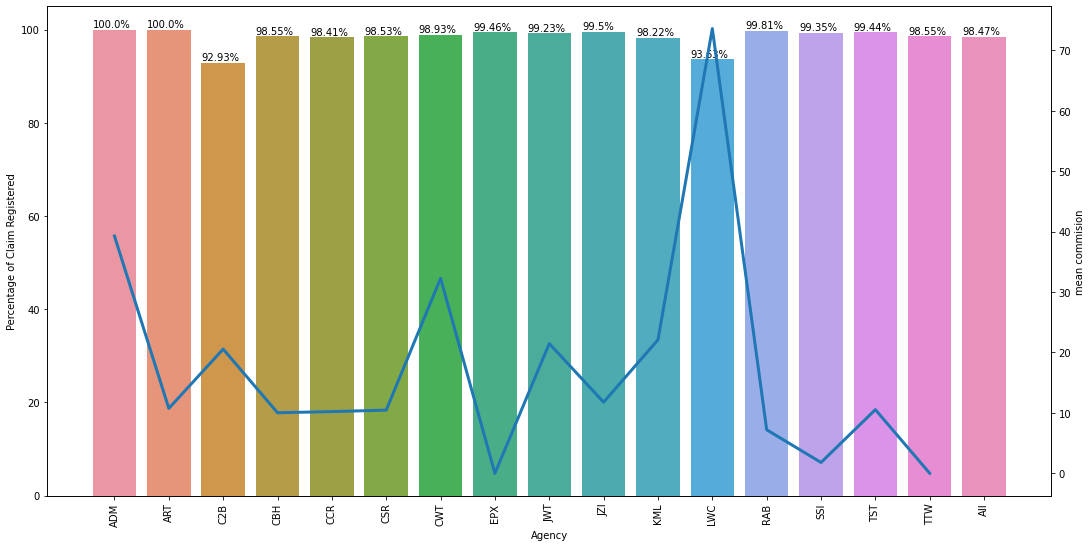

In [12]:
# Graphical representation for unclaimed agency 
fig,ax1=plt.subplots(figsize=(18,9))
ay = sns.barplot(table1.index,table1[0],ax=ax1)

for i in ay.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    ay.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.xticks(rotation=90)
ax1.set(ylabel='Percentage of Claim Registered')
ax2=ax1.twinx()
sns.lineplot(table1.index,table1['mean commision'],ax=ax2,linewidth=3);

**Insights :**
- ADM & ART has no registered claim but commission is high

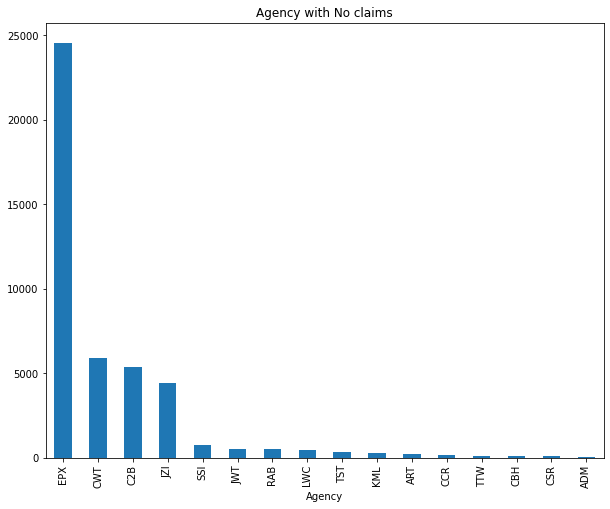

In [13]:
#Counts for  no claims using df
plt.figure(figsize=(10,8))
unclaim=df[df['Claim']==0]
unclaim['Agency'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Agency with No claims')
plt.xlabel('Agency')
# plt.style.use('seaborn')
plt.show()


In [14]:
# #Counts for  no claims using df_train 
# plt.figure(figsize=(10,8))
# unclaim=df_train[df_train['Claim']==0]
# unclaim['Agency'].value_counts().sort_values(ascending=False).plot(kind='bar')
# plt.title('Agency with No claims')
# plt.xlabel('Agency')
# plt.show()


<Figure size 720x576 with 0 Axes>

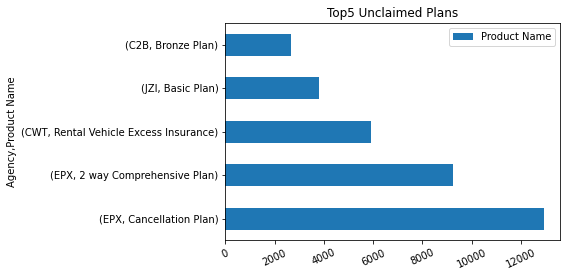

In [15]:
#plotting graph with for unclaimed products of an agency from high to low
plt.figure(figsize=(10,8))
pd.DataFrame(unclaim.groupby(['Agency'])['Product Name'].value_counts().sort_values(ascending=False))[:5].plot(kind='barh')
plt.xticks(rotation=25)
plt.title('Top5 Unclaimed Plans')
# plt.style.use('seaborn')
plt.show()

**Insights :** Mostly unclaimed insurances are from Travel Agencies like EPX and C2B forinsurances such as cancellation plan,2-way Comprehensive Plan and Rental Vehicle Excess. Online insurances like cancellation plan,2-way Comprehensive Plan are mostly unclaimed in EPX<br>
**Recommendations :** Such plans should be targeted extensively on OTA as well as on our website extensively.

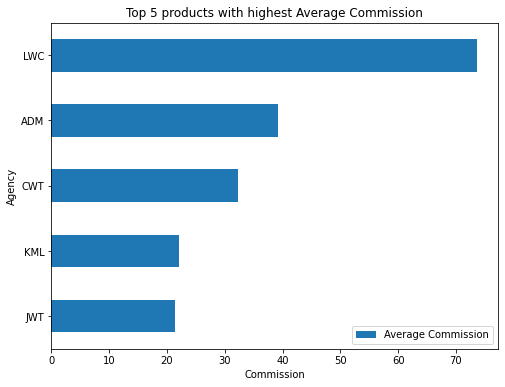

In [16]:
# Average commission for top 5 Agency
prod_comm_mean = df.groupby(['Agency'])[['Commision (in value)']].mean().sort_values('Commision (in value)', ascending = False)[:5]
prod_comm_mean.sort_values('Commision (in value)', ascending = True).plot(kind = 'barh', figsize = (8,6))
plt.title('Top 5 products with highest Average Commission')
plt.xlabel('Commission')
plt.ylabel('Agency')
plt.legend(['Average Commission'])
# plt.style.use('seaborn')
plt.show()

In [17]:
table2 = pd.crosstab(df['Product Name'],df['Claim'],margins=True)
table2 = (table2.div(table2['All'],axis = 0))*100

table2['mean commision'] = df.groupby('Product Name')['Commision (in value)'].mean()
table2['Count'] = df.groupby('Product Name')['Claim'].count()
# table2.drop(index = ['All'], inplace = True)
table2

Claim,0,1,All,mean commision,Count
Product Name,,,,,
1 way Comprehensive Plan,99.700342,0.299658,100.0,0.000000,2336.0
2 way Comprehensive Plan,98.982978,1.017022,100.0,0.000000,9341.0
24 Protect,100.000000,0.000000,100.0,8.573023,172.0
Annual Gold Plan,88.732394,11.267606,100.0,88.421620,142.0
Annual Silver Plan,88.820513,11.179487,100.0,56.874533,975.0
Annual Travel Protect Gold,88.888889,11.111111,100.0,162.641746,63.0
Annual Travel Protect Platinum,94.117647,5.882353,100.0,217.197059,34.0
Annual Travel Protect Silver,93.220339,6.779661,100.0,136.174576,59.0
Basic Plan,99.582681,0.417319,100.0,9.556534,3834.0


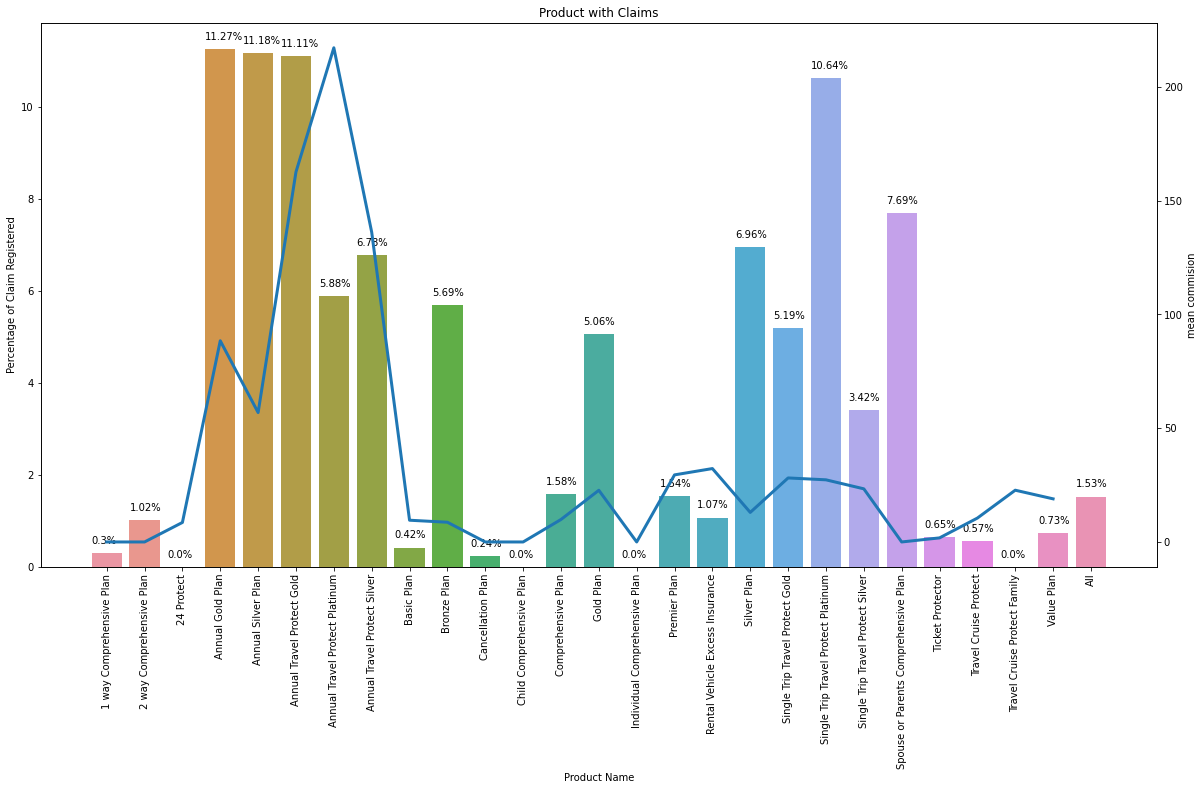

In [18]:
#Product with Claim registered
fig,ax1=plt.subplots(figsize=(20,10))
az = sns.barplot(table2.index,table2[1],ax=ax1)

for i in az.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    az.annotate(str(np.round(h,2))+ '%',(x,y+h+0.2))
    
plt.xticks(rotation=90)
plt.title('Product with Claims')
ax1.set(ylabel='Percentage of Claim Registered')
ax2=ax1.twinx()
sns.lineplot(table2.index,table2['mean commision'],ax=ax2,linewidth=3)
plt.show()

**Insights :**
- Annual Gold & Annual Silver Plan have higher number of Claims registered whereas commission drawn is  very low
- Annual Travel Protect Platinum plan has low number of Claims registered whereas commission drawn is very high

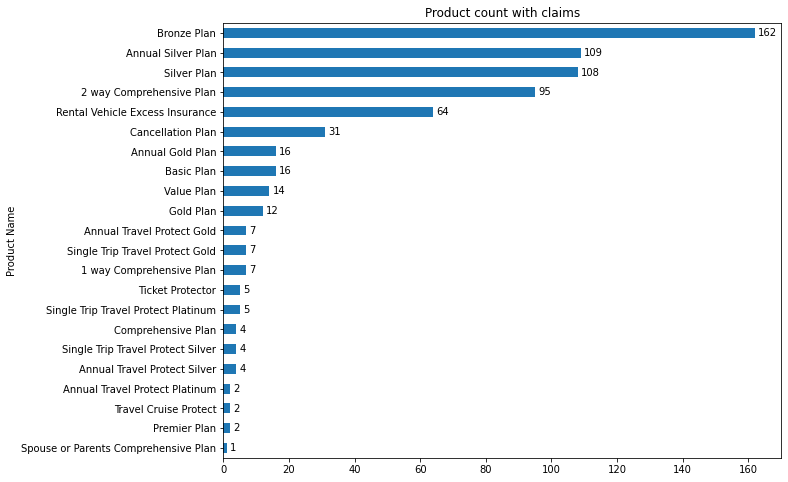

In [19]:
#product count for claims
plt.figure(figsize = (10,8))
claim = df[df['Claim']==1]
ax = claim['Product Name'].value_counts().sort_values(ascending = True).plot(kind = 'barh')

for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w)), (x+w+1,y+.1))
    
plt.title('Product count with claims')
plt.ylabel('Product Name')
plt.show()

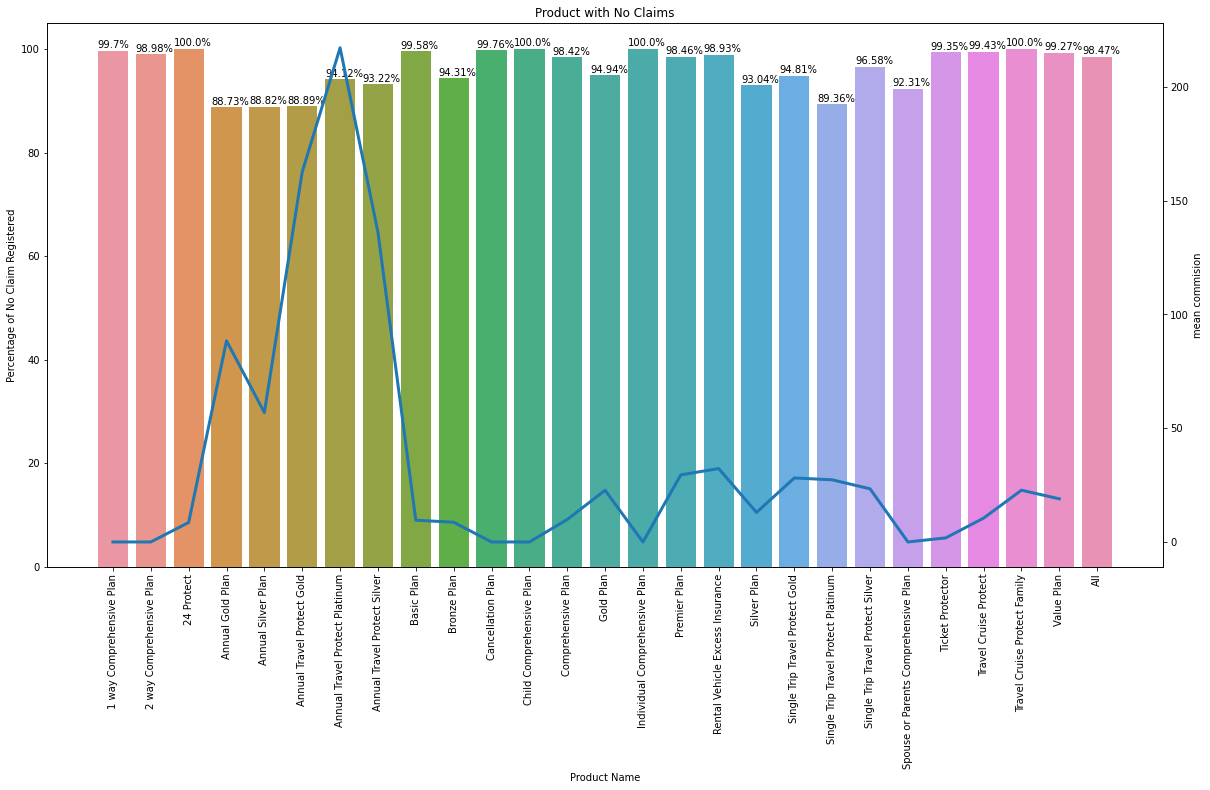

In [20]:
#Product with  No Claim registered
fig,ax1 = plt.subplots(figsize = (20,10))
az = sns.barplot(table2.index,table2[0],ax=ax1)

for i in az.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    az.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.xticks(rotation=90)
plt.title('Product with No Claims')
ax1.set(ylabel = 'Percentage of No Claim Registered')
ax2=ax1.twinx()
sns.lineplot(table2.index,table2['mean commision'],ax = ax2,linewidth = 3)
plt.show()

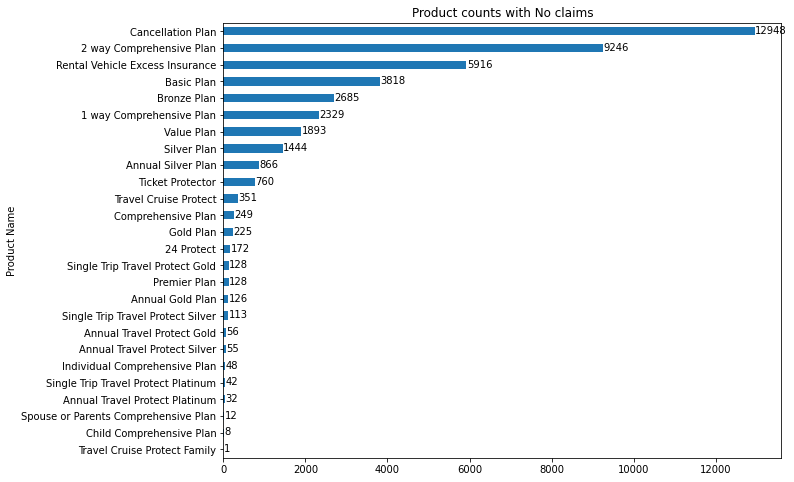

In [21]:
#Count for  No claims
plt.figure(figsize=(10,8))
no_claim = df[df['Claim']==0]
ax = no_claim['Product Name'].value_counts().sort_values(ascending = True).plot(kind = 'barh')

for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w)), (x+w+15,y+.1))
    
plt.title('Product counts with No claims')
plt.ylabel('Product Name')
plt.show()

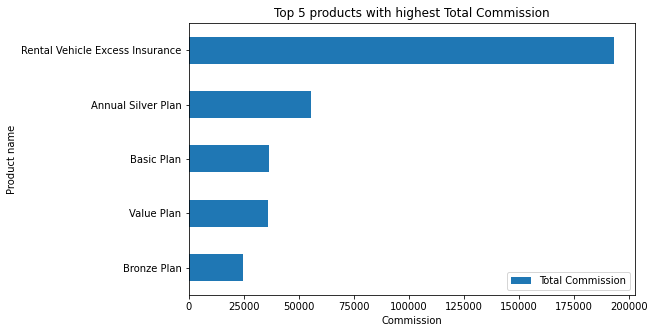

In [22]:
# Plotting for Total Commission for Top 5 products
prod_comm_sum = df.groupby(['Product Name'])[['Commision (in value)']].sum().sort_values('Commision (in value)', ascending = False)[:5]

prod_comm_sum.sort_values('Commision (in value)', ascending = True).plot(kind = 'barh', figsize = (8,5))
plt.title('Top 5 products with highest Total Commission')
plt.xlabel('Commission')
plt.ylabel('Product name')
plt.legend(['Total Commission'])
# plt.style.use('seaborn')
plt.show()

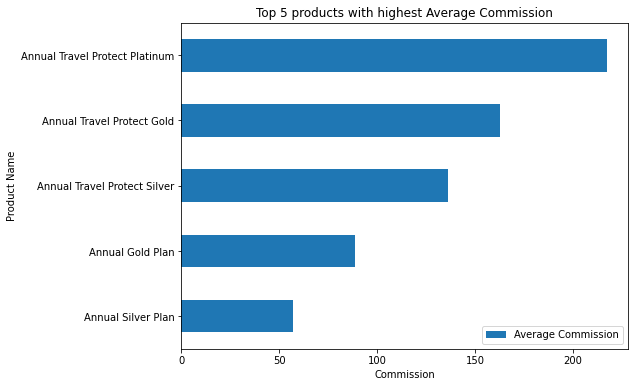

In [23]:
# Average commission for top 5 products
prod_comm_mean = df.groupby(['Product Name'])[['Commision (in value)']].mean().sort_values('Commision (in value)', ascending = False)[:5]
prod_comm_mean.sort_values('Commision (in value)', ascending = True).plot(kind = 'barh', figsize = (8,6))
plt.title('Top 5 products with highest Average Commission')
plt.xlabel('Commission')
plt.ylabel('Product Name')
plt.legend(['Average Commission'])
# plt.style.use('seaborn')
plt.show()

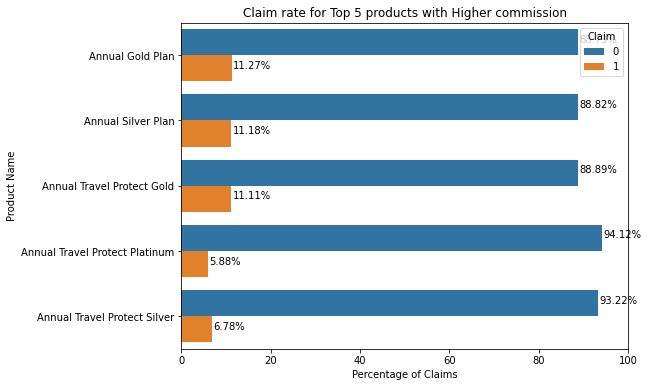

In [24]:
#Claim rate for Top 5 products with Higher commission
prod_claim_percent = pd.DataFrame(df.groupby(['Product Name'])['Claim'].value_counts(normalize = True)*100)
prod_claim_percent.columns = ['Claim Percent']
prod_claim_percent.reset_index(inplace = True)

list_netsales = ['Annual Travel Protect Platinum', 'Annual Travel Protect Gold', 'Annual Travel Protect Silver',
                 'Annual Gold Plan', 'Annual Silver Plan']


#Net Sales mean
fig = plt.figure(figsize = (8,6))
ax = sns.barplot(y='Product Name', x ='Claim Percent',
                 data = prod_claim_percent[ (prod_claim_percent['Product Name'] == list_netsales[0])|
                                            (prod_claim_percent['Product Name'] == list_netsales[1])|
                                            (prod_claim_percent['Product Name'] == list_netsales[2])|
                                            (prod_claim_percent['Product Name'] == list_netsales[3])|
                                            (prod_claim_percent['Product Name'] == list_netsales[4])]
                ,hue = 'Claim')
plt.title('Claim rate for Top 5 products with Higher commission')
plt.xlabel('Percentage of Claims')
plt.xlim((0,100))

for p in ax.patches:
    _x = p.get_x() + p.get_width() +0.3
    _y = p.get_y() + p.get_height() - 0.2
    value = str(np.round(p.get_width(),2)) + '%'
    ax.text(_x, _y, value, va='baseline', ha='left')
    
plt.show()

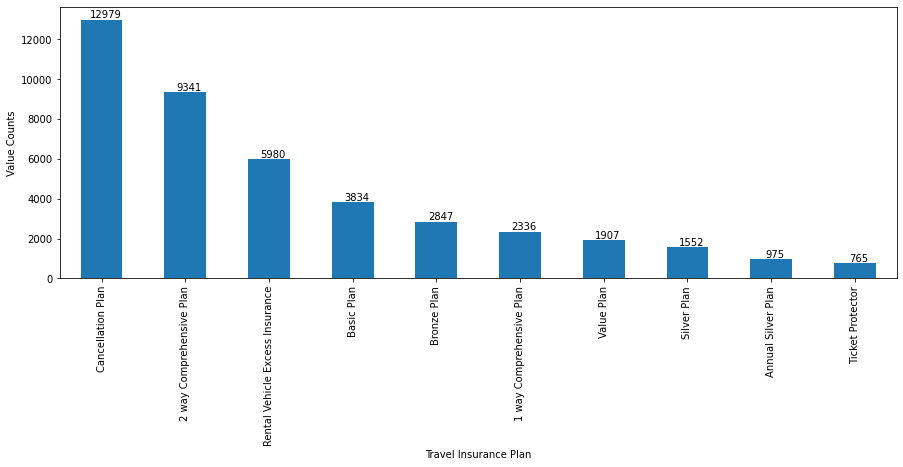

In [25]:
graph1 = df["Product Name"].value_counts().iloc[:10].plot(kind="bar", figsize=(15,5))
plt.xlabel('Travel Insurance Plan')
plt.ylabel('Value Counts')
for p in graph1.patches:
        graph1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom')

**Insights :**<br>
- Cancellation plans & 2 way Comprehensive plans are contributing more in Sales

**Recommendation :**<br>
- Cancellation plan have less claims so Agencies should focus more on this plan

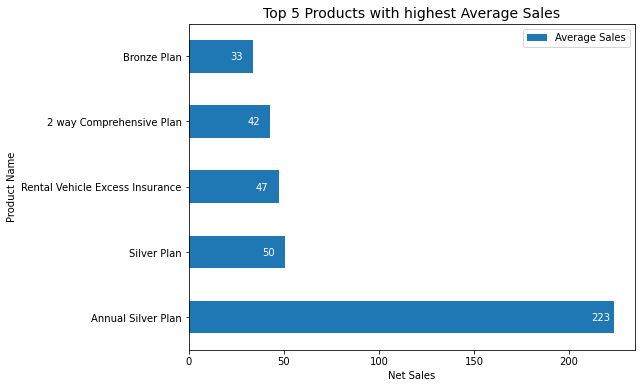

In [26]:
prod_netsales_mean = df_train.groupby(['Product Name'])[['Net Sales']].mean().sort_values('Net Sales', ascending = False)[:5]
ax = prod_netsales_mean.plot(kind='barh', figsize = (8,6))
plt.title('Top 5 Products with highest Average Sales',fontdict={'fontsize':14})
plt.xlabel('Net Sales')
plt.ylabel('Product Name')
plt.legend(['Average Sales'])
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w)), (x+w-12,y+.2),color='white')


plt.show()

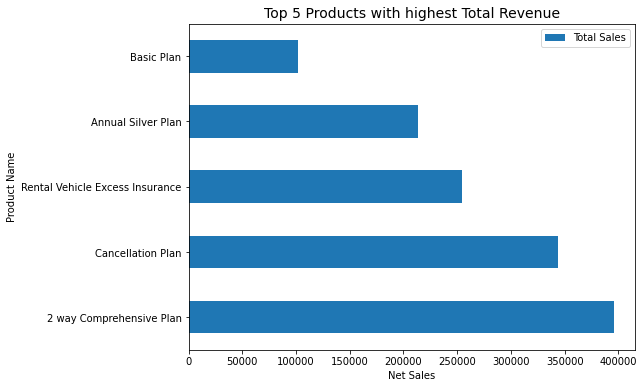

In [27]:
#Top 5 products by sum of Net Sales

prod_netsales_sum = df.groupby(["Product Name"])[["Net Sales"]].sum().sort_values("Net Sales", ascending = False).iloc[:5]

prod_netsales_sum.plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total Revenue',fontdict={'fontsize':14})
plt.xlabel('Net Sales')
plt.ylabel('Product Name')
plt.legend(['Total Sales'])

plt.show()

In [29]:
# Agencies with the most number of Net Sales

netsales_mean = (df.groupby('Agency', as_index=False)['Net Sales'].mean()).nlargest(10,'Net Sales')
netsales_mean

,Agency,Net Sales
11,LWC,110.759780
15,TTW,92.260870
2,C2B,78.812595
10,KML,56.868327
8,JWT,52.199234
0,ADM,49.345455
6,CWT,42.603110
7,EPX,32.598921
9,JZI,32.482292
5,CSR,31.676471


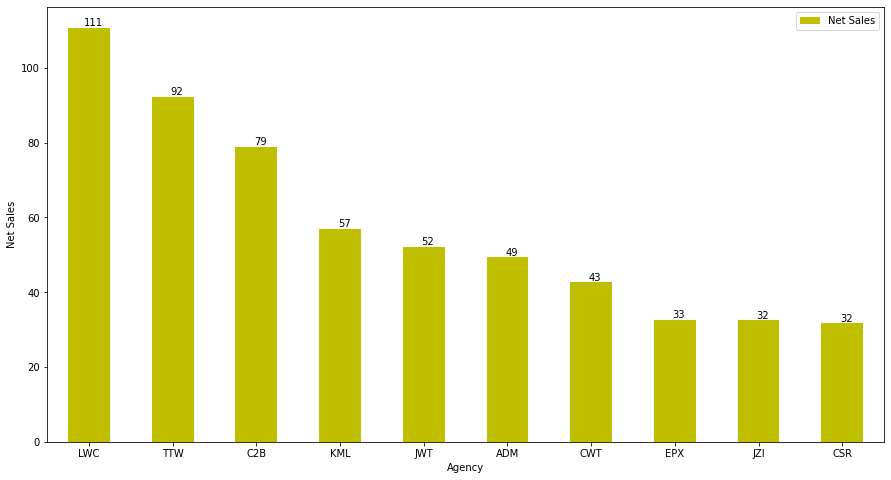

In [30]:
graph = netsales_mean.plot.bar(x = 'Agency', y = 'Net Sales', rot = 0, color = "y",figsize = (15,8))
plt.xlabel('Agency')
plt.ylabel('Net Sales')
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')